Checking some basic routines for Eduardo

In [3]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
from bsmcalls import SNPnexus
from bsmcalls import operations
import bsmutils
import genome
import os
#os.environ["PYTHONPATH"] = "/mnt/c/Users/emaur/Dropbox (MIT)/Walsh Lab/SCZ_SNV/bsm/"
os.chdir(bsmutils.get_bsmdir())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
data = SNPnexus.load_data('results/2020-09-07-annotations/annotated-calls.p')
sczgwasloci = genome.read_scz_gwas()
data = genome.annotate_with_gwas_loci(data, gwas=sczgwasloci, modify_return_data=True)
clozukpath = 'resources/CLOZUK/supp-table-4.csv'
gwasgenes = operations.get_geneset(df=pd.read_csv(clozukpath, skiprows=7), col='Gene(s) tagged')

Export SCZ GWAS geneset

In [40]:
gwasgenesl = list(gwasgenes)
gwasgenesl.sort()
df = pd.DataFrame({'SCZ GWAS genes': gwasgenesl})
df.to_csv('results/2021-06-25-reproduce/scz-gwas-genes.csv', index=False)

In [10]:
genesets = {'SCZ GWAS': gwasgenes}
querydict = {'near_gens_Overlapped Gene': genesets}
results = operations.multiquery(querydict, data, do_sum=False, do_sort=False)
summary = operations.summarize_query_results(results, data, chisq=False, margin=False)
summary#.style.bar(subset='chisq stat')

,Dx,Control,SCZ,ASD
Feature,Query,,,
near_gens_Overlapped Gene,SCZ GWAS,20,66,42


<AxesSubplot:>

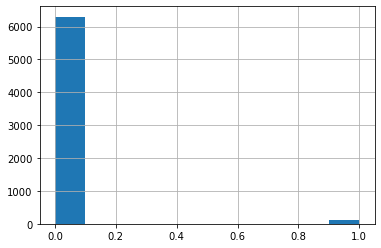

In [14]:
results[('near_gens_Overlapped Gene', 'SCZ GWAS')].hist()

Export results

In [21]:
res = pd.concat([results, data[['near_gens_Overlapped Gene']]], axis=1)
res.to_csv('results/2021-06-25-reproduce/overlapping-scz-gwas-genes.csv')

In [ ]:
%connect_info